In [2]:
#!pip install docx
import networkx as nx
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
#import docx
import math #?
import sympy
from sklearn.cluster import SpectralClustering

In [3]:
def plot_scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"etf/{title}.svg")
    plt.show() 

def plot_scatterplot2(x_data, y_data, x_label, y_label, title, file_name):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"etf/{file_name}.svg")
    plt.show() 

In [4]:
def find_ccs2(eigenvectors_holder, n):
    components = []
    already_solved = []
    for current in range(0, n):
        if current not in already_solved:
            component = [current]
            for running in range (current+1, n):
                if running not in already_solved:
                    b = True
                    for tracer in range(0, len(eigenvectors_holder)):
                        eigenvector = eigenvectors_holder[tracer]
                        if not in_range(eigenvector[current], eigenvector[running], math.pow(10,-12)):
                            b = False
                    if b:
                        component.append(running)
                        already_solved.append(running)
            already_solved.append(current)
            components.append(component)
    return components

In [5]:
def get_components3(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 
    #eigenspace0_basis = filter_matrix(eigenspace0_basis, math.pow(10, -15)) # filter values close to 0

    return find_ccs2(eigenspace0_basis, len(eigenspace0_basis[0]))

In [6]:
"""NO START 1"""
# read the multigraph
G = nx.read_pajek('dominantna_komponenta_SNetF.net')
print(G.number_of_nodes())
print(G.number_of_edges())


339
10737


C:\Users\Jovana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1097: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
C:\Users\Jovana\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


     k      lambda_k
0    1 -7.365588e-13
1    2  7.350746e+00
2    3  2.299761e+01
3    4  2.300000e+01
4    5  2.310725e+01
5    6  2.365190e+01
6    7  2.399681e+01
7    8  2.400000e+01
8    9  2.400000e+01
9   10  2.400000e+01
10  11  2.400000e+01
11  12  2.434032e+01
12  13  2.500000e+01
13  14  2.500000e+01
14  15  2.526386e+01
15  16  2.608767e+01
16  17  2.699517e+01
17  18  2.700000e+01
18  19  2.700000e+01
19  20  2.745727e+01
20  21  2.800000e+01
21  22  4.608768e+01
22  23  4.699844e+01
23  24  4.720453e+01
24  25  4.799805e+01
25  26  4.832137e+01
26  27  5.016828e+01
27  28  5.217771e+01
28  29  6.003026e+01
29  30  6.121332e+01


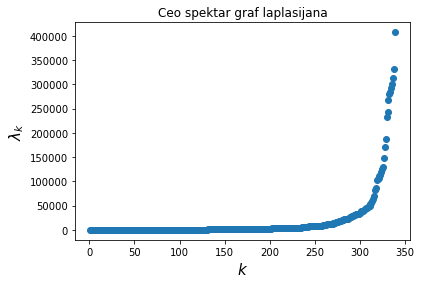

In [8]:
"""NO START 2"""

L = nx.laplacian_matrix(G).toarray()

eigenvalues = linalg.eigvals(L) # TODO: change to .eigenvalsh because we know the matrix is symmetric
eigenvalues.sort()
enumerator = np.array(range(1, len(eigenvalues)+1))
df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))

# write eigenvalue table
df_eig30 = df_eig[:30]
df_eig30.columns = ['k', 'lambda_k']
df_eig30 = df_eig30.astype({'k': 'int32', 'lambda_k':'float'})
print(df_eig30)

plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana')

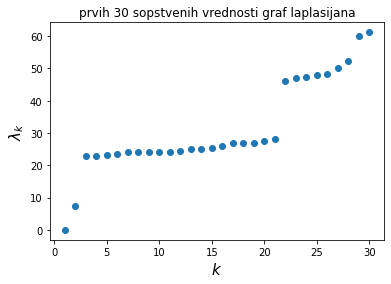

In [39]:
"""NO START 3"""

df_eig_30 = df_eig[:30]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', 'prvih 30 sopstvenih vrednosti graf laplasijana')


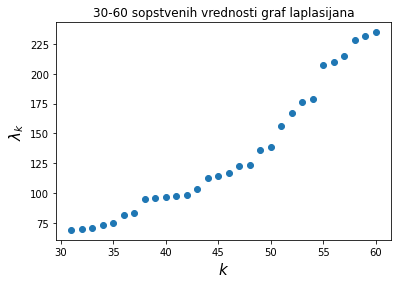

In [40]:
df_eig_30 = df_eig[30:60]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', '30-60 sopstvenih vrednosti graf laplasijana')


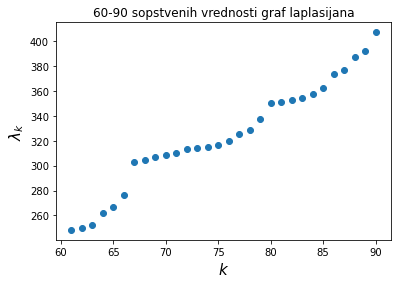

In [41]:
df_eig_30 = df_eig[60:90]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', '60-90 sopstvenih vrednosti graf laplasijana')


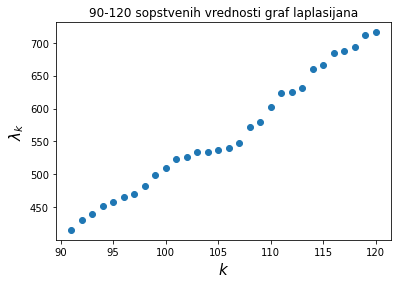

In [42]:
df_eig_30 = df_eig[90:120]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', '90-120 sopstvenih vrednosti graf laplasijana')


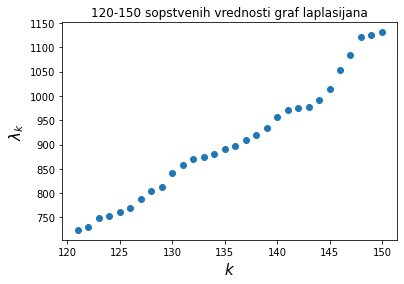

In [43]:
df_eig_30 = df_eig[120:150]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', '120-150 sopstvenih vrednosti graf laplasijana')


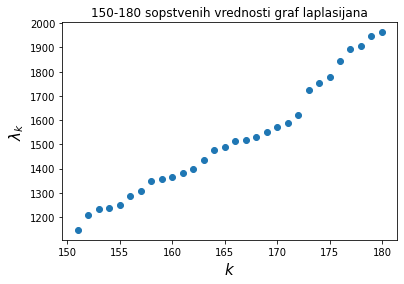

In [44]:
df_eig_30 = df_eig[150:180]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', '150-180 sopstvenih vrednosti graf laplasijana')


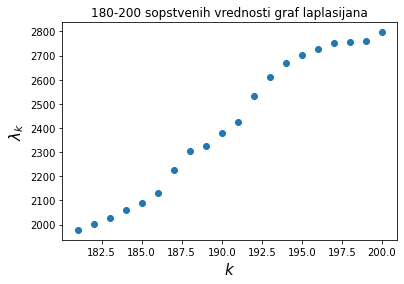

In [45]:
df_eig_30 = df_eig[180:200]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', '180-200 sopstvenih vrednosti graf laplasijana')


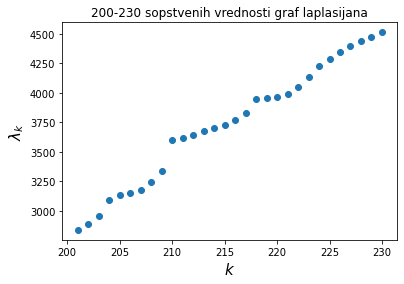

In [46]:
df_eig_30 = df_eig[200:230]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', '200-230 sopstvenih vrednosti graf laplasijana')


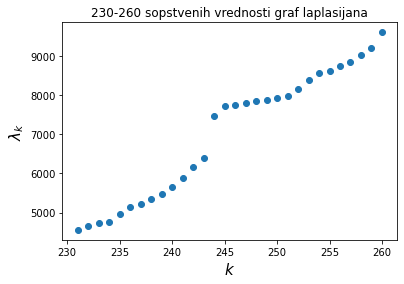

In [47]:
df_eig_30 = df_eig[230:260]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', '230-260 sopstvenih vrednosti graf laplasijana')


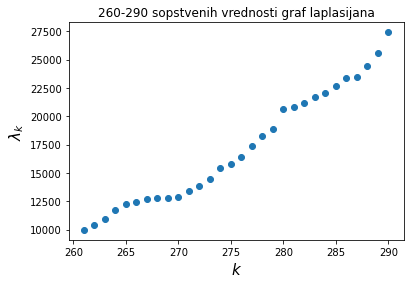

In [48]:
df_eig_30 = df_eig[260:290]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', '260-290 sopstvenih vrednosti graf laplasijana')


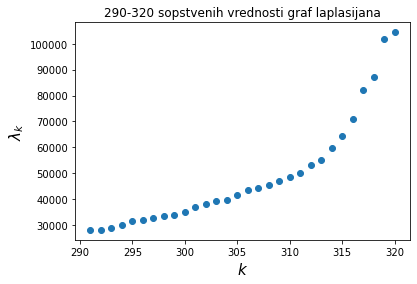

In [49]:
df_eig_30 = df_eig[290:320]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', '290-320 sopstvenih vrednosti graf laplasijana')


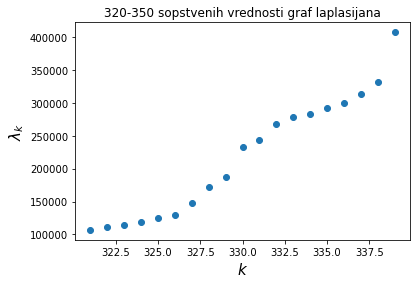

In [50]:
df_eig_30 = df_eig[320:350]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', '320-350 sopstvenih vrednosti graf laplasijana')


C:\Users\Jovana\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1097: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


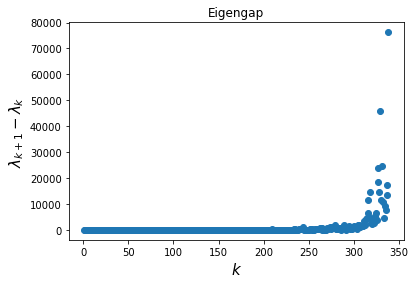

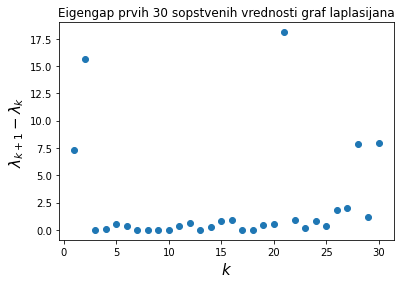

In [17]:
# eigengap


df_gap = df_eig.iloc[:,1].diff()
df_gap = df_gap.astype(np.float64)

df_gap = df_gap[1:]
enumerator_column = np.array(range(1, len(df_gap)+1))

df_gap = pd.DataFrame(list(zip(enumerator_column, df_gap)))
  
plot_scatterplot(df_gap.iloc[:,0], df_gap.iloc[:,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap')

plot_scatterplot(df_gap.iloc[:30,0], df_gap.iloc[:30,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap prvih 30 sopstvenih vrednosti graf laplasijana')


In [ ]:
def get_components2(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 
    #eigenspace0_basis = filter_matrix(eigenspace0_basis, math.pow(10, -15)) # filter values close to 0

    #print("EVM:")
    #EV_mat = np.array(list(eigenspace0_basis)).T
    #print(pd.DataFrame(EV_mat))
    
    IV_rref, _ = sympy.Matrix(eigenspace0_basis).rref()
    print(IV_rref)
    
    
    # transformation into indicator vectors
    #indicator_vector_container = []
    #for eigenvector in eigenspace0_basis:
        
    #    max_component = max([abs(c) for c in eigenvector])
    #    indicator_vector = [abs(c/max_component) for c in eigenvector] # normalization to 1's and 0's
    #    indicator_vector_container.append(indicator_vector)
    
    #print("Indicator vector matrix:")
    IV_mat = np.array(IV_rref).T
    #print(pd.DataFrame(IV_mat))
        
    components = []
    IV_rref = np.array(IV_rref)
    for iv in IV_rref:
        component = []
        for i, c in enumerate(iv):
            if in_range(c, 1.0, math.pow(10, -12)):
                component.append(i)
        components.append(component)
    
    return components

In [ ]:
def in_range(value, target, tolerated_error):
    return abs(value-target) < tolerated_error

def filter_matrix(m, tolerated_error):
    new_matrix = []
    for row in m:
        new_row = []
        for value in row:
            if in_range(0 , value, tolerated_error):
                new_row.append(0.0)
            else:
                new_row.append(value)
        new_matrix.append(new_row)
    return new_matrix

def get_components(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 


    print("EVM:")
    EV_mat = np.array(list(eigenspace0_basis)).T
    print(pd.DataFrame(EV_mat))
    
    # transformation into indicator vectors
    indicator_vector_container = []
    for eigenvector in eigenspace0_basis:
        
        max_component = max([abs(c) for c in eigenvector])
        indicator_vector = [abs(c/max_component) for c in eigenvector] # normalization to 1's and 0's
        indicator_vector_container.append(indicator_vector)
    
    print("Indicator vector matrix:")
    IV_mat = np.array(indicator_vector_container).T
    print(pd.DataFrame(IV_mat))
        
    components = []
    for iv in indicator_vector_container:
        component = []
        for i, c in enumerate(iv):
            if in_range(c, 1.0, math.pow(10, -12)):
                component.append(i)
        components.append(component)
    
    return components


In [ ]:
#test
W = [[0,0,0,0,0,0], [0,0,1,0,0,0,], [0,1,0,0,0,0,], [0,0,0,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,0]]
D = np.diag([0,1,1,2,2,2])
Test_L = D - np.array(W)
get_components3(Test_L,3)

In [ ]:
# partition G2 to components
components = get_components3(L, 21)

#print(components)
component_sizes = [len(c) for c in components]
print(component_sizes)
print(sum(component_sizes))
zipped = list(zip(component_sizes, components)) # pair component sizes and components
zipped.sort(key=lambda tup: tup[0], reverse = True) # sort pairs by component size
component_sizes, components = zip(*zipped) 
#print(component_sizes)
#print(sum(component_sizes))

dominant_component_indexes = components[0]

dominant_component_labels = []
for i, label in enumerate(list(G2.nodes())):
    if i in dominant_component_indexes:
        dominant_component_labels.append(label)

#print(dominant_component_indexes)
#print(dominant_component_labels)

In [26]:
dominant_component = G2.subgraph(dominant_component_labels)
nx.write_pajek(dominant_component, "dominantna_komponenta.net")
#print(dominant_component.nodes)

L_dom = nx.laplacian_matrix(dominant_component).toarray()

eigenvalues = linalg.eigvals(L_dom) # TODO: change to .eigenvalsh because we know the matrix is symmetric
eigenvalues.sort()
enumerator = np.array(range(1, len(eigenvalues)+1))
df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))

# write eigenvalue table
"""df_eig30 = df_eig[:30]
df_eig30.columns = ['k', 'lambda_k']
df_eig30 = df_eig30.astype({'k': 'int32', 'lambda_k':'float'})
print(df_eig30)

doc = Document()
#doc = docx.Document('tabela_eig.docx')
t = doc.add_table(df_eig30.shape[0]+1, df_eig30.shape[1])
t.cell(0,0).text = r'$k$'
t.cell(0,1).text = r'$\lambda_k$'
for i in range(df_eig30.shape[0]):
    for j in range(df_eig30.shape[-1]):
        t.cell(i+1,j).text = str(df_eig30.values[i,j])
doc.save('etf/tabela_eig_dominantna_komponenta.docx')"""


plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana dominantne komponente')

df_eig_30 = df_eig[:30]
plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', 'Prvih 30 sopstvenih vrednosti graf laplasijana dom. komponente')


NameError: name 'dominant_component_labels' is not defined

In [ ]:
# eigengap


df_gap = df_eig.iloc[:,1].diff()
df_gap = df_gap.astype(np.float64)

df_gap = df_gap[1:]
enumerator_column = np.array(range(1, len(df_gap)+1))

df_gap = pd.DataFrame(list(zip(enumerator_column, df_gap)))
  
plot_scatterplot(df_gap.iloc[:,0], df_gap.iloc[:,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap dominantne komponente')

plot_scatterplot2(df_gap.iloc[:30,0], df_gap.iloc[:30,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap prvih 30 sopstvenih vrednosti \n graf laplasijana dominantne komponente', 'Eigengap prvih 30 sopstvenih vrednosti graf laplasijana dominantne komponente')

In [51]:
"""NO START 4"""
for k in range(2, 40):
    
    clustering = SpectralClustering(n_clusters=k,
    assign_labels="discretize", affinity="precomputed").fit(nx.adjacency_matrix(G))

    colors = clustering.labels_
    c_string = []
    for c in colors:
        c_string.append(str(c))

    Net = nx.Graph()
    for c, label in zip(c_string, G.nodes()):
        Net.add_node(label, color=c)

    for edge in G.edges(data=True):
        #print(edge)
        Net.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

    # nx.write_pajek(G, "etf/spectral3.net")
    nx.write_gml(Net, f"DOMACI/spectral{k}.gml")
    
    csizes = np.zeros(k)
    for c in colors:
        csizes[int(c)] += 1
    
    print(f"Podela na {k}: velicine komponenata su {csizes}")
    

Podela na 2: velicine komponenata su [336.   3.]
Podela na 3: velicine komponenata su [334.   2.   3.]
Podela na 4: velicine komponenata su [332.   2.   2.   3.]
Podela na 5: velicine komponenata su [330.   2.   2.   3.   2.]
Podela na 6: velicine komponenata su [330.   2.   2.   3.   2.   0.]
Podela na 7: velicine komponenata su [290.   2.   2.   3.  40.   2.   0.]
Podela na 8: velicine komponenata su [107.   2.   3. 195.   2.   6.  22.   2.]
Podela na 9: velicine komponenata su [104. 197.   3.   2.   2.   2.  21.   2.   6.]
Podela na 10: velicine komponenata su [151.  23.   3.   2.   2.  47.   2.   2.  99.   8.]
Podela na 11: velicine komponenata su [141.   2.   2.   2.  10.   2.   2.  65.  23.  87.   3.]
Podela na 12: velicine komponenata su [ 85. 143.   2.   1.   3.   2.  18.  73.   2.   2.   1.   7.]
Podela na 13: velicine komponenata su [110.   2.  77.   3.   2.  18.   2.  64.   2.  38.  10.   9.   2.]
Podela na 14: velicine komponenata su [ 75. 119.  15.   3.   1.   6.   2.   2.